<a href="https://colab.research.google.com/github/DrMorganJones/ACS6427/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Class One: Ordinary Least-Squares**

Morgan Jones*

**Foreword**: Often with computer programming there is more than one way to numerically solve a problem. Therefore the answers provided to the tasks contained in this lab may not be the same (or even as an efficient implementation) as your answers. Try to solve the the tasks before looking at the answers. If you get stuck or don't understand the solution ask a GTA for help. There're many good toolboxes when it comes to machine learning but in general these labs will not cover these toolboxes. Blindly applying functions from toolboxes is not conducive to understanding or learning. Moreover, practical problems arising from industry often to do not conform to the structure/formulation needed to mindlessly apply these “off the shelf” functions. Without a deep understanding or the ability to code machine learning algorithms from scratch it will be challenging to make the required under the hood modifications to the underlying toolbox code needed to solve these practical problems. This is one of the reasons why the lab answers are only given in the Matlab syntax. Some may argue that there are better programming languages for machine learning like Python, R, Java, Julia, etc. However, the choice of programminglanguage is less important than having an understanding of the method. After all, Microsoft claimed in 2021 that Excel was
“the worlds most widely used programming language” but few would argue that these labs should be completed in Excel due
to it's popularity with industry. Python is a fantastic language for learning and exploring machine learning. It's widely used in both academia and industry, and has an enormous ecosystem of libraries like NumPy, PyTorch, TensorFlow, and scikit-learn that make experimentation easier. Its syntax is readable and beginner-friendly, and Python's strong community means that if you get stuck, you're likely to find helpful discussions, tutorials, or examples online. While Python might not always feel as tightly integrated as MATLAB when it comes to plotting or certain kinds of debugging, tools like matplotlib, seaborn, and Jupyter notebooks offer powerful alternatives that are commonly used by researchers and professionals alike. We encourage you to use Python if you're comfortable with it—you'll be building skills that will serve you well beyond this course. If at any point you need help understanding the core methods, feel free to refer back to the MATLAB solutions or seek support, but know that Python is more than capable for tackling every lab in this module. The purpose of the labs are

* To provide extra learning opportunities for the content covered in lectures.

* To provide you with a space that allows you to improve your coding skills problem solving, plotting and displaying complex data, etc with GTA support if you get stuck. These skills will be useful when it comes to writing the report for the coursework of this module.

## **1  Goal:**

<p align="justify">
This lab supplements the lecture material on ordinary least squares. The intended learning outcomes of this lab are as follows:

1. To be able to identify and code the correct regressor matrix for a variety of problems.

2. To be able to fit models that are linear in the unknown parameters by numerically solving the Ordinary Least Squares
(OLS) problem.

## **2  Background Material: Ordinary Least Squares**

<p align="justify">
Given a matrix $X \in \mathbb{R}^{n \times m}$ and a vector $Y \in \mathbb{R}^n $, the Ordinary Least Squares (OLS) problem is formulated as,

\begin{equation}
    \theta^* = \arg\min_{\theta \in \mathbb{R}^m} \| X\theta - Y \|_2^2.  \tag{1}
\end{equation}

We have seen in lectures that the analytical solution of the OLS problem (1) is given by,

\begin{equation}
    \theta^* = (X^\top X)^{-1} X^\top Y.  \tag{2}
\end{equation}

Many problems in Machine Learning (ML) boil down to solving the OLS problem (1). For instance, suppose we are given a labelled data set $(x_i, y_i)_{i=1}^n$ and asked to fit the following regressor model,
\begin{equation}
    y = \sum_{i=1}^m \theta_i \phi_i(x) + \varepsilon,  \tag{3}
\end{equation}
where $\{\phi_i\}$ are general basis functions. We have seen in lectures that this problem can be solved by solving the OLS problem (1) with

\begin{equation}
Y = \begin{bmatrix}
y_1 \\ \vdots \\ y_n
\end{bmatrix}, \quad
\theta = \begin{bmatrix}
\theta_1 \\ \vdots \\ \theta_m
\end{bmatrix}, \quad
X = \begin{bmatrix}
\phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_m(x_1) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(x_n) & \phi_2(x_n) & \cdots & \phi_m(x_n)
\end{bmatrix}.  \tag{4}
\end{equation}

## **3  Exercises**

### **3.1 Task 1**

<p align="justify">
The goal of Task 1 is to re-create Fig. 1 that was presented in Lecture 1.

**Task 1.1:** For discrete points $x \in \{0, 0.5, 1, 1.5, \ldots, 10\}$, generate a data set $(x_i, y_i)_{i=1}^n$ from the following model:

\begin{equation}
    y = e^x + 10000\varepsilon,\ \text{where } \varepsilon \sim 𝑼 (-0.5, 0.5). \tag{5}
\end{equation}

**Hint:** $\varepsilon \sim 𝑼(-0.5, 0.5)$ means that $\varepsilon$ has a uniform distribution within $[-0.5,0.5]$.

**Answer 1.1:**

In [ ]:
import numpy as np    # Import NumPy library
np.random.seed(45)

x = np.arange(0,10.5,0.5)[:, np.newaxis]
y = np.exp(x) + 10000*np.random.uniform(-0.5,0.5)


<p align="justify">
**Task 1.2:** Using the data set $(x_i, y_i)_{i=1}^n$ generated from the model given by Eq. (5) in the previous task, fit the following model,

\begin{equation}
    y = \theta_1 + \theta_2x + \varepsilon  \tag{6}
\end{equation}

**Hint:** What are the basis functions required to express this model as the form given in Eq. (3)? Use this to find $Y$ and $X$ from Eq. (4) and substitute into the analytical OLS solution given in Eq. (2).

**Answer 1.2:**

In [ ]:
Psi_1 = np.concatenate((np.ones((np.size(x),1)),x),axis=1)
#theta_star_1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(Psi_1.transpose(),Psi_1)),Psi_1.transpose()),y)
theta_star_1 = np.linalg.inv(Psi_1.transpose() @ Psi_1) @ Psi_1.transpose() @ y

<p align="justify">

**Task 1.3:** What label value does the fitted model given in Eq. (6) predict at $x = 7$?

**Answer 1.3:**

In [ ]:
x_eval_1 = np.array([[1],[7]])
y_eval_1 = theta_star_1.transpose() @ x_eval_1
print(y_eval_1)

[[10015.64603585]]


<p align="justify">

**Task 1.4:** What is the Mean Squared Error (MSE) associated with the fitted model given in Eq. (6)?

**Hint:** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{m} \theta_j^* \, \phi_j(x_i) \right)^2$.

**Answer 1.4:**

In [ ]:
MSE_1 = 1/np.size(x,0)*np.linalg.norm(y-Psi_1@theta_star_1)**2
print(MSE_1)



15575959.398960436


<p align="justify">

**Task 1.5:** Using the data set $(x_i, y_i)_{i=1}^n$, generated from the model given by Eq. (5), fit the following 10th order polynomial
model,

\begin{equation}
    y = \theta_1 + \sum_{i=1}^{10} \theta_{i+1} x^i + \varepsilon. \tag{7}
\end{equation}

**Answer 1.5:**

In [ ]:
Psi_2 = np.ones((np.size(x),1))

for i in range(1,11):
  Psi_2 = np.concatenate((Psi_2,x**i),axis=1)

theta_star_2 = np.linalg.inv(Psi_2.transpose() @ Psi_2) @ Psi_2.transpose() @ y

<p align="justify">

**Task 1.6:** What label value does the fitted model given in Eq. (7) predict at $x = 7$?

**Answer 1.6:**

In [ ]:
x_eval_2 = np.array([[1]]);

for i in range(1,11):
  x_eval_2 = np.concatenate((x_eval_2,np.array([[7**i]])),axis=0)

y_eval_2 = theta_star_2.transpose() @ x_eval_2
print(y_eval_2)

[[5996.29994246]]


<p align="justify">

**Task 1.7:** What is the Mean Squared Error (MSE) associated with the fitted model given in Eq. (6)?

**Hint:** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{m} \theta_j^* \, \phi_j(x_i) \right)^2$.

**Answer 1.7:**

In [ ]:
MSE_2 = 1/np.size(x,0)*np.linalg.norm(y-Psi_2@theta_star_2)**2
print(MSE_2)

456.67997362453775


<p align="justify">

**Task 1.8:** Which fitted model, Eq. (6) or Eq. (7), had the smaller MSE? Why did it have a smaller MSE?

<p align="justify">
**Answer 1.8:** The model given by Eq. (7) had a smaller MSE than the model given in Eq. (6). This is because it has more
basis functions and hence can express more complicated functions. We can recover any model of the form Eq. (6) by simply
selecting ${\theta_3=\ldots=\theta_{10}=0}$. Therefore we can get a better fit since we have the more flexibility in how we select ${\theta_3,\ldots,\theta_{10}}$.

**Task 1.9:** Generate 20 **different** data sets from the model given in Eq. (5) (that is, repeat Task 1.1 20 times) and fit the models
given in Eqs (6) and (7) to each data set (so there will be 2 x 20 fitted models in general). Create an array of the predicted
labels for each of these models at predict at $x = 7$.

**Hint:** Whenever you hear the word “repeat” in a computer programming problem never copy and paste, think for-loop.

**Answer 1.9:**

In [ ]:
y = np.zeros((len(x), 20))
y_eval_1 = np.zeros((20,1))
y_eval_2 = np.zeros((20,1))

for data_sample in range(20):

  for i in range(len(x)):
    y[i,data_sample] = np.exp(x[i,0]) + 10000*np.random.uniform(-0.5,0.5)

  theta_star_1 = np.linalg.inv(Psi_1.transpose() @ Psi_1) @ Psi_1.transpose() @ y[:,data_sample]
  theta_star_2 = np.linalg.inv(Psi_2.transpose() @ Psi_2) @ Psi_2.transpose() @ y[:,data_sample]

  y_eval_1[data_sample] = theta_star_1.transpose() @ x_eval_1
  y_eval_2[data_sample] = theta_star_2.transpose() @ x_eval_2

**Task 1.10:** Recreate Fig. 1.

<div align="center">
  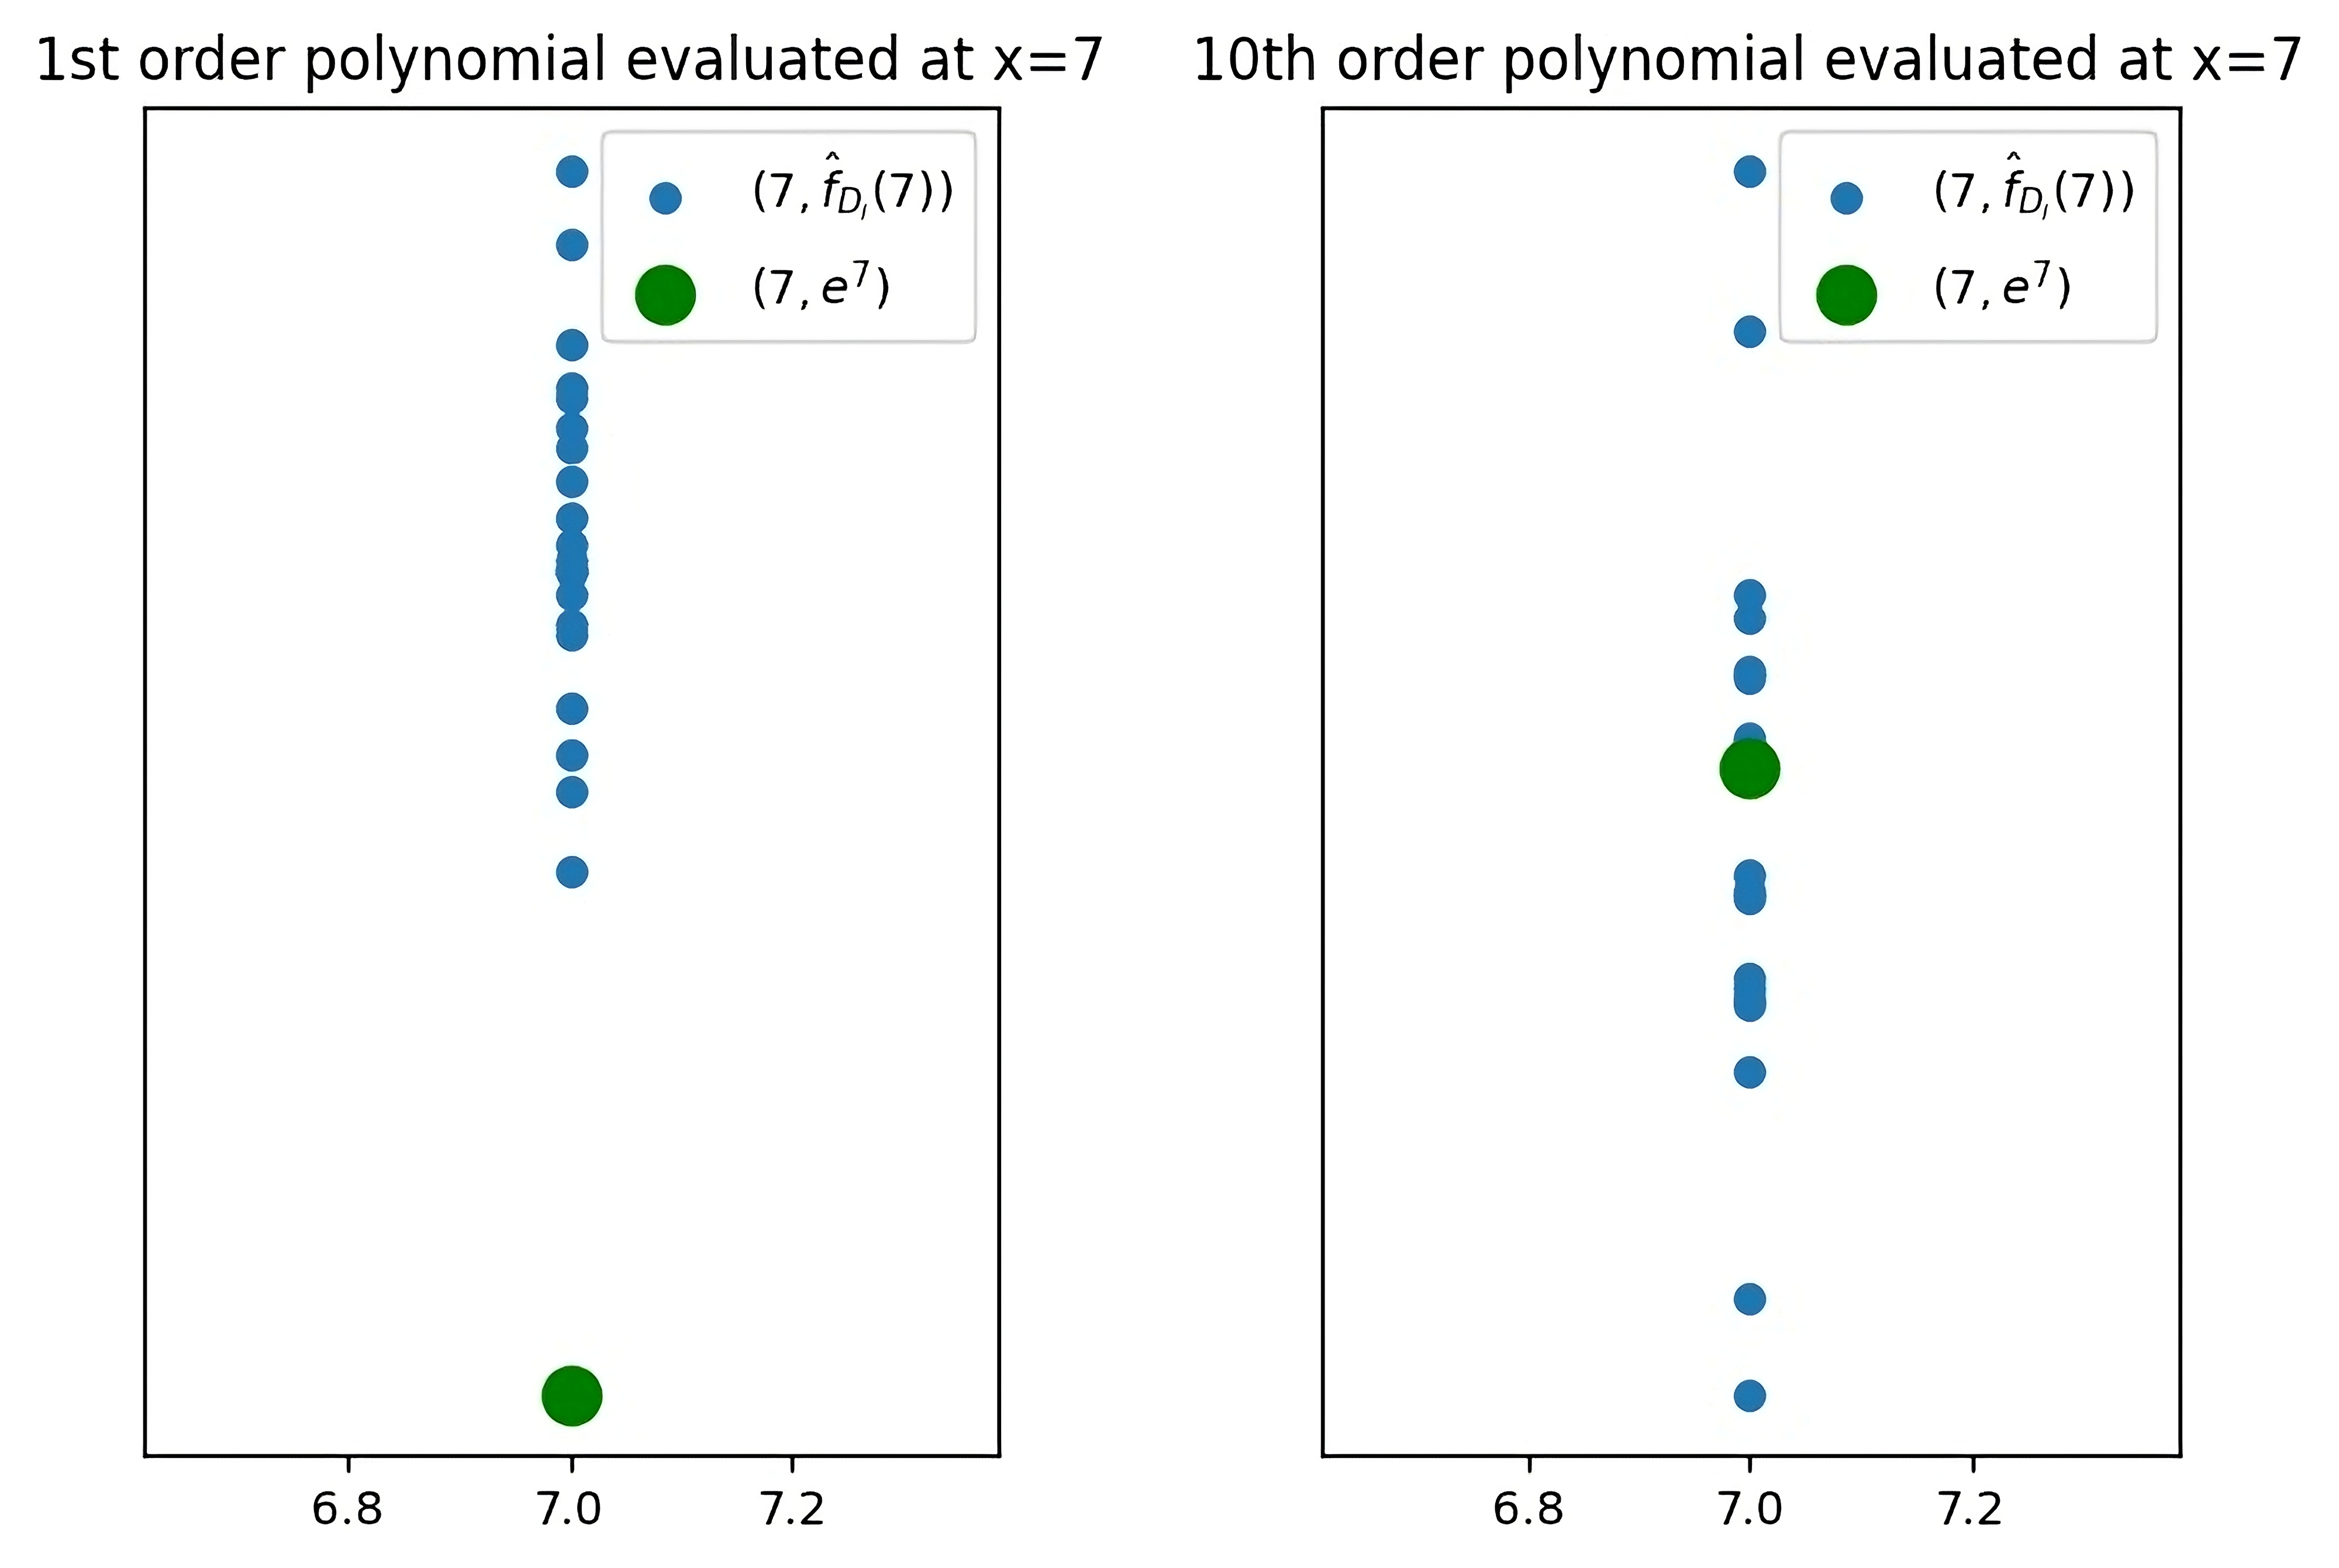
  <p><b>Figure 1: </b>Plot showing predicted labels from first order (Eq. (6)) and tenth order (Eq. (7)) models fitted on 20 different random
instantiations of a data set generated according to the model given in Eq. (5). The true label (ignoring the noise corruption) is
given by the green dot.</p>
</div>

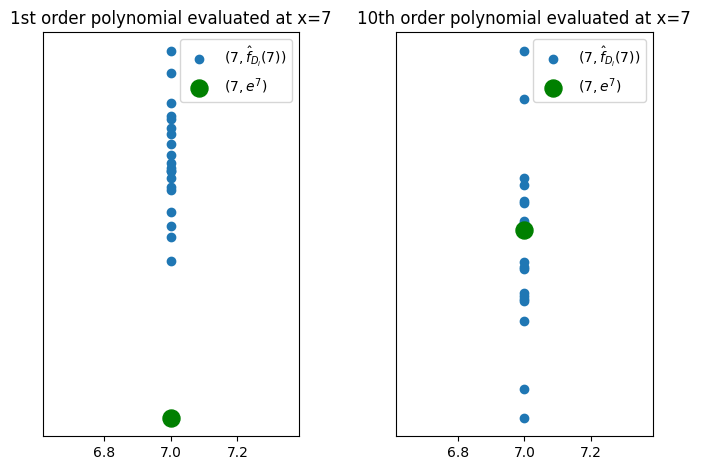

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.scatter(7*np.ones((len(y_eval_1),1)),y_eval_1,label="$(7,\hat{f}_{D_i}(7))$")
plt.scatter(7,np.exp(7),150,"green",label="$(7,e^7)$")
plt.title("1st order polynomial evaluated at x=7")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(7*np.ones((len(y_eval_2),1)),y_eval_2,label="$(7,\hat{f}_{D_i}(7))$")
plt.scatter(7,np.exp(7),150,"green",label="$(7,e^7)$")
plt.title("10th order polynomial evaluated at x=7")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()

plt.tight_layout(w_pad=7)
plt.show()

**Task 1.11:** Why was Fig. 1 used to explain the bias variance trade-off in Lecture 1 of this module?
Hint: You may find it useful to recall the bias-variance tradeoff by using Figure 1.

**Answer 1.11:** The first order model is less complex than the tenth order model. It exhibits less variance since the label predictions, represented by the blue dots, are more consistent and closer together. Consequently, the first order model has less variance in prediction.

 On the other hand, the true model's label is $e^x$ and is denoted by the green dot. The tenth order model's average prediction
 is approximately equal to the green dot, indicating that this model has a lower bias.

 This clearly illustrates the bias-variance tradeoff as seen in Fig. 2, where more complex models tend to have lower bias but are more susceptible to overfitting noise, resulting in greater variance in label predictions. On the other hand, more simple models tend to have lower variance but are unable to explain the complexities in the data resulting in high bias. Both bias and variance contribute to model prediction error. Therefore, it is essential to select a model that strikes a balance—complex enough to have minimal bias yet not so complex that it exhibits excessive variance. In this example, it appears that a model somewhere between the complexity of the first and tenth order model would preform better, for instance a fifth-order model may outperform both the first and tenth-order models.

<div align="center">
  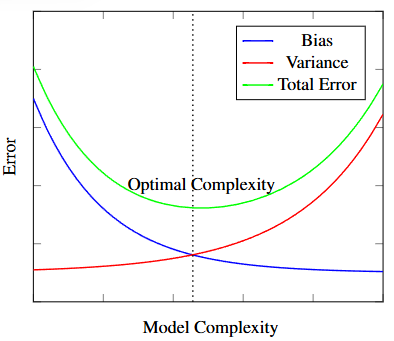
  <p><b>Figure 2:</b> Bias-Variance Tradeoff.</p>
</div>

### **3.2 Task 2**

The goal of Task 2 is to re-create Fig. 3 that was presented in Lecture 3.

<div align="center">
  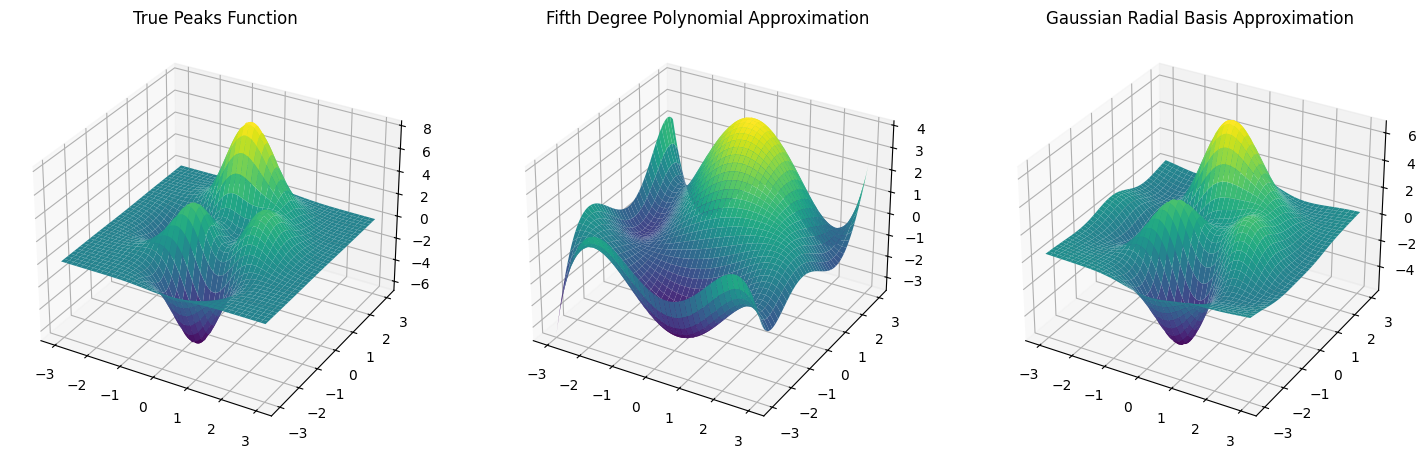
  <p><b>Figure 3:</b> Plot showing python's <code>peaks</code> function along with various approximations found using least squares.</p>
</div>

**Task 2.1:** The `peaks` function is a synthetic surface commonly used for visualization and demonstration. It is defined by the formula:

\begin{equation}
y = peaks(x_1, x_2) = 3(1 - x_1)^2 e^{-x_1^2 - (x_2 + 1)^2} - 10\left(\frac{x_1}{5} - x_1^3 - x_2^5\right) e^{-x_1^2 - x_2^2} - \frac{1}{3} e^{-(x_1 + 1)^2 - x_2^2}. \tag{8}
\end{equation}

While this is a built-in function in MATLAB, it is not available by default in Python. Therefore, it needs to be manually defined, which has been done for you.

```
def peaks(x, y):
    return (3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
        - 1/3 * np.exp(-(x + 1)**2 - y**2))
```

Plot the surface given by $\left\{ (x_1, x_2, y) \in \mathbb{R}^3 \;:\; y = \text{peaks}(x_1, x_2) \text{ for } -3 \leq x_1 \leq 3 \text{ and } -3 \leq x_2 \leq 3 \right\}$.

**Hint:** Look at the Matlab documentation for the peaks function. Note that if $n \in \mathbb{R}$ then for `peaks(n)` “MATLAB creates
the grid as `[X,Y] = meshgrid(linspace(-3,3,n))`”.

**Answer 2.1:**

In [ ]:
import plotly.graph_objects as go

def peaks(x, y):
    return (3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
        - 1/3 * np.exp(-(x + 1)**2 - y**2))

x_p = np.linspace(-3, 3, 100)
y_p = np.linspace(-3, 3, 100)
X_p, Y_p = np.meshgrid(x_p, y_p)
Z_p = peaks(X_p, Y_p)

# Create a figure
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
# Plot the surface of the peaks function
ax.plot_surface(X_p, Y_p, Z_p, cmap='viridis')
ax.set_title('3D Surface Plot of Peaks Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('peaks(x, y)')
ax.set_box_aspect(aspect=None, zoom=0.9) # To reveal the z-label

plt.show()

**Task 2.2:** Discretize $[−3,3]^2 \subset \mathbb{R}^2$ with gap size $0.05$ to get discrete points $x_i ∈ \{(-3,-3),(-3,-2.95),(-3,-2.9),...(3,3)\}$
to generate a data set, $(x_i, y_i)_{i=1}^n$, from the `peaks` model.

**Answer 2.2:**

In [ ]:
x_p = np.arange(-3, 3.05, 0.05)
y_p = np.arange(-3, 3.05, 0.05)

X1, X2 = np.meshgrid(x_p, y_p)
X3 = peaks(X1, X2)

x1 = X1.flatten()
x2 = X2.flatten()
Y = X3.flatten()

**Task 2.3:** Using the data set $(x_i, y_i)_{i=1}^n$, generated from the `peaks` model in the previous task, fit the following two dimensional fifth-order polynomial model,

\begin{equation}
y = \sum_{0 \leq i_1 + i_2 \leq 5} \theta_{i_1, i_2} x_1^{i_1} x_2^{i_2} + \varepsilon. \tag{9}
\end{equation}

**Hint 1:** The following Python function for the row vector of the monomial basis functions associated with a two-dimensional fifth order polynomial might be helpful to you:

```
def z_poly(x1, x2):
    return np.column_stack((
        np.ones_like(x1),           # x1^0 (constant term)
        x1,                          # x1^1
        x2,                          # x2^1
        x1**2,                       # x1^2
        x1*x2,                       # x1^1 * x2^1
        x2**2,                       # x2^2
        x1**3,                       # x1^3
        x1**2*x2,                    # x1^2 * x2^1
        x1*x2**2,                    # x1^1 * x2^2
        x2**3,                       # x2^3
        x1**4,                       # x1^4
        x1**3*x2,                    # x1^3 * x2^1
        x1**2*x2**2,                 # x1^2 * x2^2
        x1*x2**3,                    # x1^1 * x2^3
        x2**4,                       # x2^4
        x1**5,                       # x1^5
        x1**4*x2,                    # x1^4 * x2^1
        x1**3*x2**2,                 # x1^3 * x2^2
        x1**2*x2**3,                 # x1^2 * x2^3
        x1*x2**4,                    # x1^1 * x2^4
        x2**5                        # x2^5
    ))
```
**Hint 2:** What are the basis functions required to express this model as the form given in Eq. (3)? Use this to find Y and X from Eq. (4) and substitute into the analytical OLS solution given in Eq. (2).

**Answer 2.3:**

In [ ]:
def z_poly(x1, x2):
    return np.column_stack((
        np.ones_like(x1),                  # x1^0
        x1,                                # x1^1
        x2,                                # x2^1
        x1**2,                             # x1^2
        x1*x2,                             # x1*x2
        x2**2,                             # x2^2
        x1**3,                             # x1^3
        x1**2*x2,                          # x1^2*x2
        x1*x2**2,                          # x1*x2^2
        x2**3,                             # x2^3
        x1**4,                             # x1^4
        x1**3*x2,                          # x1^3*x2
        x1**2*x2**2,                       # x1^2*x2^2
        x1*x2**3,                          # x1*x2^3
        x2**4,                             # x2^4
        x1**5,                             # x1^5
        x1**4*x2,                          # x1^4*x2
        x1**3*x2**2,                       # x1^3*x2^2
        x1**2*x2**3,                       # x1^2*x2^3
        x1*x2**4,                          # x1*x2^4
        x2**5                              # x2^5
    ))

Psi_poly = z_poly(x1, x2)
w_poly = np.linalg.inv(Psi_poly.transpose() @ Psi_poly) @ Psi_poly.transpose() @ Y

**Task 2.4:** What is the Mean Squared Error (MSE) associated with the fitted model given in Eq. (9)?

**Hint:** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{m} \theta_j^* \, \phi_j(x_i) \right)^2$.

**Answer 2.4:**

In [ ]:
MSE_1 = 1/np.size(x1,0)*np.linalg.norm(Y-Psi_poly @ w_poly)**2
print(MSE_1)

**Task 2.5:** Using the data set $(x_i, y_i)_{i=1}^n$, generated from the `peaks` model in the previous task, fit the following two dimensional Gaussian Radial Basis Function (GRBF) model,

\begin{equation}
y = \theta_0 + \sum_{i=1}^{20} \theta_i \exp\left( -\frac{\lVert x - 6c_i\rVert_2}{2}\right) + \varepsilon, \tag{10}
\end{equation}

where $c_i \sim \mathcal{U}\left( \begin{bmatrix} -0.5 \\ -0.5 \end{bmatrix}, \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} \right), \quad \text{for } i \in \{1, \dots, 20\}$.

**Hint:** $c_i \sim \mathcal{U}\left( \begin{bmatrix} -0.5 \\ -0.5 \end{bmatrix}, \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} \right)$ means that $c_i$ has a uniform distribution within $\left[0.5, 0.5\right] \times \left[0.5, 0.5\right] \subset \mathbb{R}^2$. The Python function `np.random.uniform` samples uniformly distributed values given the range $[-0.5,0.5]$.

**Answer 2.5:**

In [ ]:
m = 21
N = len(x1)
C = np.random.uniform(-0.5, 0.5, (m-1, 2))
Psi_GRBF = np.zeros((N,m))

for i in range(N):
  diff = np.linalg.norm(np.array([x1[i], x2[i]]) - C, axis=1)
  Psi_GRBF[i, 1:] = np.exp(-0.5 * diff**2)

Psi_GRBF[:,0] = 1
w_GRBF = np.linalg.inv(Psi_GRBF.transpose() @ Psi_GRBF) @ Psi_GRBF.transpose() @ Y

**Task 2.6:** What is the Mean Squared Error (MSE) associated with the fitted model given in Eq. (10)?

**Hint:** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{m} \theta_j^* \, \phi_j(x_i) \right)^2$.

**Answer 2.6:**

In [ ]:
MSE_GRBF = 1/np.size(x1,0)*np.linalg.norm(Y-Psi_GRBF @ w_GRBF)**2
print(MSE_GRBF)

**Task 2.7:** Which fitted model, Eq. (9) or Eq. (10), had the smaller MSE? What reason was given in lectures to explain the
smaller MSE?


**Answer 2.7:** In general the GRBF model had lower MSE, although this can change depending on the instantiation of the randomly generated centers, $c_i$. This is surprising since both models comprise of basis functions that are universal approximators and both models have the same number of parameters/decision variables so we would expect them to have similar MSE. However, the GRBF model looks more similar to the `peaks` function given in Eq. (8). This is an example of white/grey box fitting where we harness knowledge about the underlying structure of the rule that created the data set. Typically these methods require less decision variables for the same training error and exhibit a lower tendency of overfitting.

**Task 2.8:** Re-create Fig. 3.

**Answer 2.8:**

In [ ]:
def f_GRBF(x, y, C, w_GRBF):
    diff = np.array([x, y]) - C
    squared_dist = np.sum(diff**2, axis=1)
    return w_GRBF[0] + np.dot(w_GRBF[1:], np.exp(-0.5 * squared_dist))

def f_poly(x, y, w_poly, z_poly):
    return w_poly @ z_poly(x, y).flatten()

X, Y = np.meshgrid(x_p, y_p)
Z1 = np.zeros_like(X)
Z2 = np.zeros_like(X)

# Loop through the mesh grid and compute function values
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z1[i, j] = f_GRBF(X[i, j], Y[i, j], C, w_GRBF)
        Z2[i, j] = f_poly(X[i, j], Y[i, j], w_poly, z_poly)

# Plotting the results
fig = plt.figure(figsize=(18, 6))

# Plot True Peaks Function
ax1 = fig.add_subplot(131, projection='3d')
X_p, Y_p = np.meshgrid(x_p, y_p)
Z_p = peaks(X_p, Y_p)  # Peaks function
ax1.plot_surface(X_p, Y_p, Z_p, cmap='viridis')
ax1.set_title('True Peaks Function')

# Plot Polynomial Approximation
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_title('Fifth Degree Polynomial Approximation')

# Plot Gaussian RBF Approximation
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z1, cmap='viridis')
ax3.set_title('Gaussian Radial Basis Approximation')

plt.show()

## **4  Further Exploration**

Now that you understand the least squares method modify the tasks and investigate what happens. Some suggestions of things
you could try:



*   What happens if you change the probability distribution of the noise $\varepsilon$ or centers $c$?
*   What happens if you change the basis functions? For instance what happens if you combine models given in Eq. (9) or
Eq. (10) to get $y = \sum_{0 \leq i_1 + i_2 \leq 5} \theta_{i_1,i_2} \, x_1^{i_1} x_2^{i_2} + a_0 + \sum_{i=1}^{20} a_i \exp\left( -\frac{\|x - 6c_i\|^2}{2} \right) + \varepsilon$

---
 *M. Jones is the module leader of ACS6427 - Data Modelling and Machine Intelligence from the Department of Automatic Control and Systems Engineering, The University of Sheffield. E-mail: morgan.jones@sheffield.ac.uk



## **Appendix**

### **Interactive plotting in Colab**

During the course of this work, it was observed that 3D plots rendered in Google Colab often appear as static images, which limits user interaction such as rotation, zooming and panning. In contrast, environments like MATLAB provide interactive 3D plots by default, making it much easier to explore the structure and features of complex surfaces.

To provide a similar interactive experience in Python, the following code snippet demonstrates how to generate a 3D surface plot of the classic `peaks` function using `plotly`. This interactive plot allows users to rotate the view, zoom in, and inspect the surface from various angles, offering a clearer and more intuitive understanding of the function's behavior.

In [ ]:
import numpy as np
import plotly.graph_objects as go

def peaks(x, y):
    return (3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
        - 1/3 * np.exp(-(x + 1)**2 - y**2))

x_p = np.linspace(-3, 3, 100)
y_p = np.linspace(-3, 3, 100)
X_p, Y_p = np.meshgrid(x_p, y_p)
Z_p = peaks(X_p, Y_p)

fig = go.Figure(data=[go.Surface(z=Z_p, x=X_p, y=Y_p, colorscale='Viridis')])
fig.update_layout(
    title="3D Surface Plot of Peaks Function",
    height=600,
    width=700,
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='peaks(x, y)',
        aspectmode='cube'
    )
)
fig.show()